In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import seaborn as sns
import sklearn.metrics
from keras.preprocessing import image
from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import top_k_accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import precision_recall_curve as PRC
from sklearn.metrics import average_precision_score as APS
plt.style.use('ggplot')

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/train/',
                                                 target_size = (224, 224),
                                                 shuffle=True)

Found 10590 images belonging to 13 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/val/',
                                            target_size = (224, 224),
                                            shuffle=False)

Found 1303 images belonging to 13 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(13, activation='softmax')
])

In [ ]:
from keras.callbacks import History 
history = History()

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

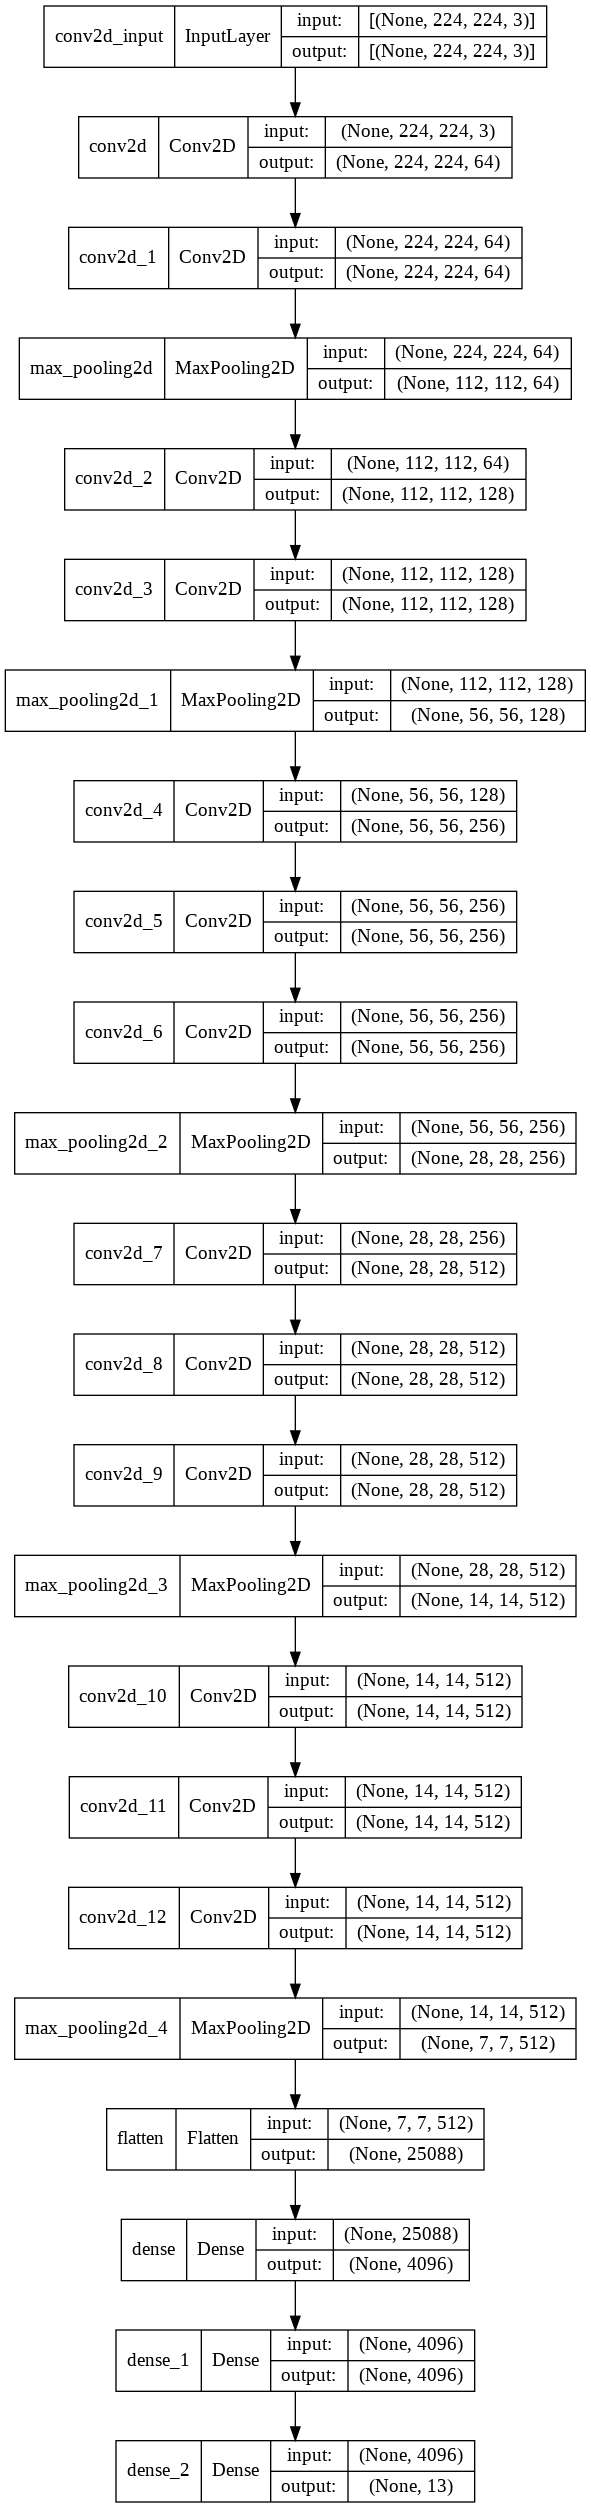

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [ ]:
for cls, idx in training_set.class_indices.items():
    print('Class nr ',idx,' -> ', cls)

Class nr  0  ->  0Capri
Class nr  1  ->  10Pachy
Class nr  2  ->  12Phyll
Class nr  3  ->  14Macro
Class nr  4  ->  1Pnoep
Class nr  5  ->  2Malac
Class nr  6  ->  3Malac
Class nr  7  ->  4Anthi
Class nr  8  ->  5Anthr
Class nr  9  ->  6Corvu
Class nr  10  ->  7Dryoc
Class nr  11  ->  8Elanu
Class nr  12  ->  9Ortho


In [ ]:
History = model.fit(training_set, validation_data = test_set, batch_size=16,epochs=7,callbacks=[history])

Epoch 1/7
331/331 [==============================] - 9402s 28s/step - loss: 1.7464 - accuracy: 0.4512 - val_loss: 1.1295 - val_accuracy: 0.6309
Epoch 2/7
331/331 [==============================] - 291s 877ms/step - loss: 0.9730 - accuracy: 0.6865 - val_loss: 0.8212 - val_accuracy: 0.7467
Epoch 3/7
331/331 [==============================] - 291s 878ms/step - loss: 0.6880 - accuracy: 0.7806 - val_loss: 0.7008 - val_accuracy: 0.7767
Epoch 4/7
331/331 [==============================] - 290s 875ms/step - loss: 0.5436 - accuracy: 0.8323 - val_loss: 0.6017 - val_accuracy: 0.8266
Epoch 5/7
331/331 [==============================] - 290s 876ms/step - loss: 0.4501 - accuracy: 0.8639 - val_loss: 0.5653 - val_accuracy: 0.8296
Epoch 6/7
331/331 [==============================] - 291s 877ms/step - loss: 0.3720 - accuracy: 0.8863 - val_loss: 1.0013 - val_accuracy: 0.7437
Epoch 7/7
331/331 [==============================] - 291s 879ms/step - loss: 0.3181 - accuracy: 0.9056 - val_loss: 0.4990 - val_acc

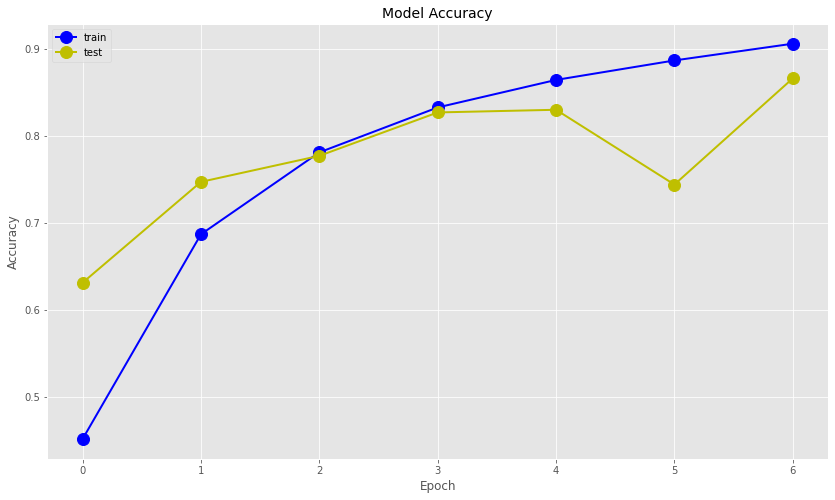

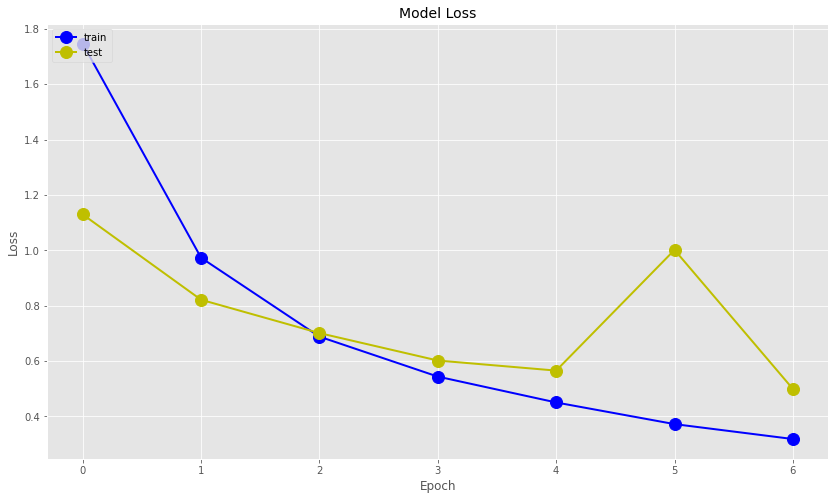

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'], 'bo-', linewidth=2, markersize=12)
plt.plot(History.history['val_accuracy'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'], 'bo-', linewidth=2, markersize=12 )
plt.plot(History.history['val_loss'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])

41/41 [==============================] - 11s 252ms/step - loss: 0.4990 - accuracy: 0.8657
n Test_Accuracy:- 0.865694522857666


confusion matrix
[[ 72   0   3   0   0   1   0   0   2   0   0   2   0]
 [  0  34   3   1   0   0   1   0   4   1   2   7   1]
 [  1   3 268   0   0   1   0   0   0   0   0   3   1]
 [  1   1   9 159   0   0   1   0  11   0   0   1   0]
 [  0   2   4   2 135   1   0   4   0   0   0   0   0]
 [  0   1   1   0   0  57   1   0   0   0   0   0   2]
 [  0   2   5   2   0   2  44   1   3   0   3  17   1]
 [  0   0   3   0   1   0   0  36   0   0   0   0   0]
 [  2   0   5   1   0   0   0   1  34   1   3   1   0]
 [  0   1   5   0   0   0   0   0   6  52   1   6   0]
 [  1   2   0   1   0   0   0   0   6   4  43   1   0]
 [  0   0   1   0   0   0   0   0   0   0   2 135   0]
 [  0   1   2   0   0   0   1   0   1   0   0   0  59]]


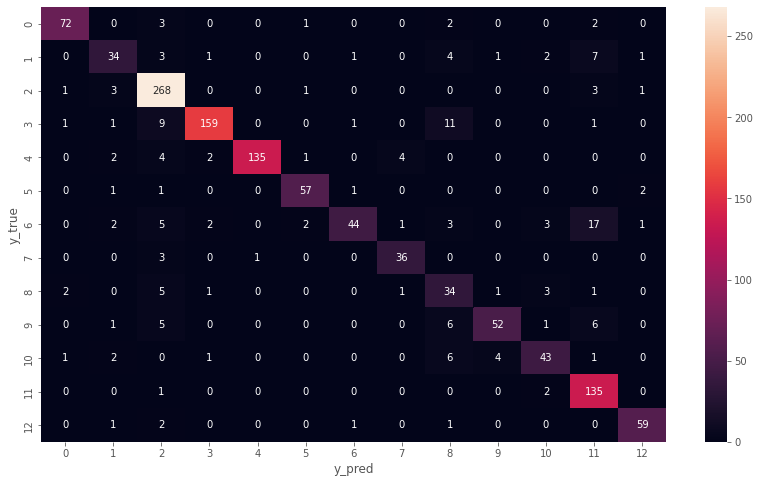

In [ ]:
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Capri       0.94      0.90      0.92        80
     10Pachy       0.72      0.63      0.67        54
     12Phyll       0.87      0.97      0.91       277
     14Macro       0.96      0.87      0.91       183
      1Pnoep       0.99      0.91      0.95       148
      2Malac       0.92      0.92      0.92        62
      3Malac       0.92      0.55      0.69        80
      4Anthi       0.86      0.90      0.88        40
      5Anthr       0.51      0.71      0.59        48
      6Corvu       0.90      0.73      0.81        71
      7Dryoc       0.80      0.74      0.77        58
      8Elanu       0.78      0.98      0.87       138
      9Ortho       0.92      0.92      0.92        64

    accuracy                           0.87      1303
   macro avg       0.85      0.83      0.83      1303
weighted avg       0.88      0.87      0.86      1303



In [ ]:
model.save('/content/drive/MyDrive/Birddata_split/vgg-16_mels11.hdf5')

In [ ]:
finalpreds = pd.DataFrame(y_pred)
finalpreds.to_csv('/content/drive/MyDrive/Birddata_split/submit11.csv',index=False)

In [ ]:
target_names1 = []
for key in test_set.class_indices:
  target_names1.append(key)

print(target_names1)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


ROC AUC score: 0.9069028256446768


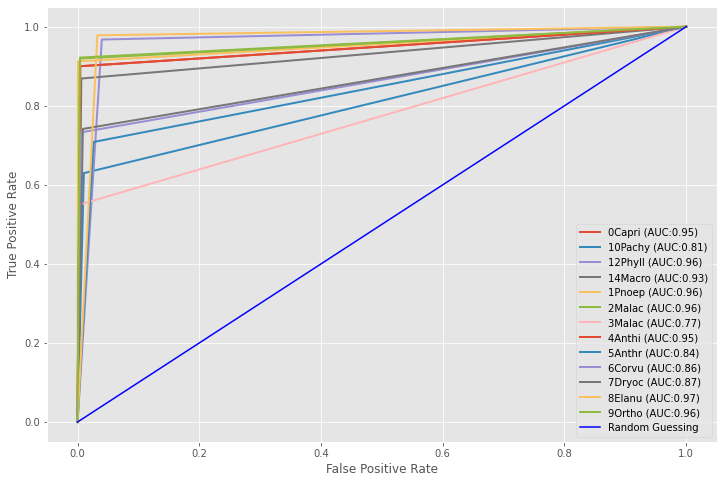

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_preds, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_preds = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_preds[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)), linewidth=2)
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_preds, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_set.classes, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=5)

0.967766692248657

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=5, normalize=False)

1261

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=1)

0.8656945510360706

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=1, normalize=False)

1128